# 📓 02 Análisis Exploratorio de Datos Espaciales (ESDA)

Este notebook se enfoca en la exploración visual y estadística de los datos cargados en PostGIS para la comuna de San Bernardo.

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv("../.env")

db_url = f"postgresql://{os.getenv('POSTGRES_USER')}:{os.getenv('POSTGRES_PASSWORD')}@{os.getenv('POSTGRES_HOST', 'localhost')}:5432/{os.getenv('POSTGRES_DB')}"
engine = create_engine(db_url)

print("Conectado a:", os.getenv('POSTGRES_DB'))

Conectado a: geodatabase


## 1. Visualización de Capas Base

Cargamos y visualizamos las capas principales: límites, edificios y amenidades.

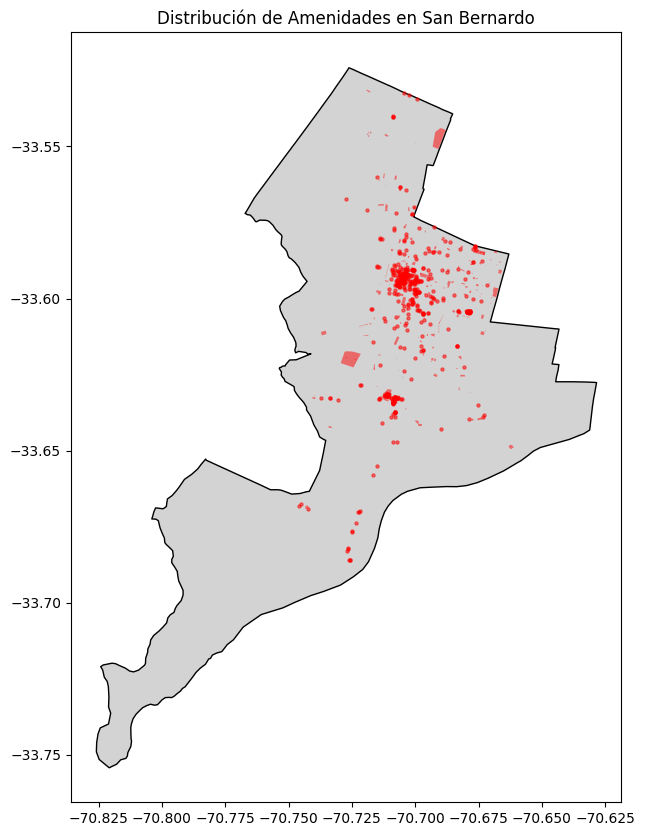

In [4]:
boundary = gpd.read_postgis("SELECT * FROM raw_data.comuna_boundaries", engine, geom_col='geometry')
amenities = gpd.read_postgis("SELECT * FROM raw_data.osm_amenities", engine, geom_col='geometry')

fig, ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, color='lightgrey', edgecolor='black')
amenities.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title("Distribución de Amenidades en San Bernardo")
plt.show()

## 2. Estadísticas de Amenidades

Analizamos qué tipos de servicios predominan.

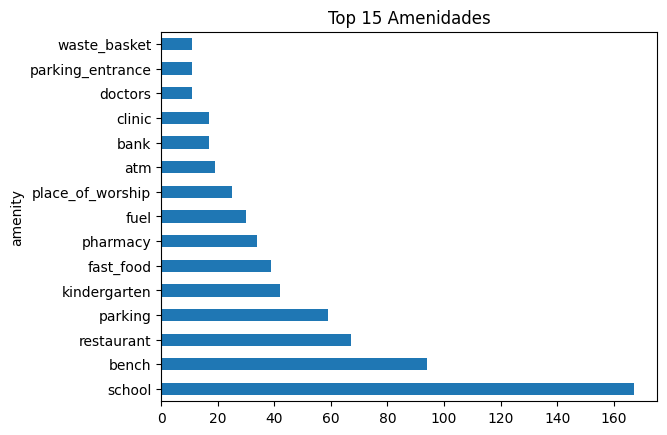

In [5]:
amenities['amenity'].value_counts().head(15).plot(kind='barh')
plt.title("Top 15 Amenidades")
plt.show()